# Image Perception Study - Complete Data Analysis
## Within-Subjects Design: Label Effects on AI vs Human-Created Images

**Study Design:**
- Each participant views 4 images (2 AI, 2 Real)
- Full confusion matrix per participant: TP, TN, FP, FN
- DVs: Perceived Effort, Sharing Intent

**Analysis Goals:**
1. Merge stimuli log with form responses
2. Descriptive statistics and visualization
3. Test label effects (mislabel vs true label)
4. Test image origin effects (AI vs Real)
5. Interaction effects
6. Individual difference analyses (AI familiarity)

---
## 1. Setup and Data Loading

In [1]:
# Import libraries
import os
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import ttest_rel
from statsmodels.stats.anova import AnovaRM

warnings.filterwarnings("ignore")

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["font.size"] = 11

# Create figures directory if it doesn't exist
os.makedirs("figures", exist_ok=True)
print("Figures directory created!")

print("Libraries loaded successfully!")

Figures directory created!
Libraries loaded successfully!


In [2]:
# Load the two CSV files
stimuli_df = pd.read_csv('log.csv')
form_df = pd.read_csv('form_responses.csv')

print(f"Stimuli Log: {stimuli_df.shape[0]} participants, {stimuli_df.shape[1]} columns")
print(f"Form Responses: {form_df.shape[0]} participants, {form_df.shape[1]} columns")
print("\nFirst few rows of Stimuli Log:")
stimuli_df.head()

Stimuli Log: 117 participants, 14 columns
Form Responses: 117 participants, 15 columns

First few rows of Stimuli Log:


,Timestamp,Participant_Email,T1_Image,T1_Label,T1_Condition,T2_Image,T2_Label,T2_Condition,T3_Image,T3_Label,T3_Condition,T4_Image,T4_Label,T4_Condition
0,11/19/2025 15:32:00,mahsan.salarkhan@gmail.com,images/ai/stars.png,AI-Generated,TP (True Positive),images/real/football.png,Human-Created,TN (True Negative),images/ai/tsunami.png,Human-Created,FN (False Negative),images/real/trekker.png,AI-Generated,FP (False Positive)
1,11/19/2025 15:41:00,27110079@lums.edu.pk,images/ai/apples.png,AI-Generated,TP (True Positive),images/real/trekker.png,Human-Created,TN (True Negative),images/real/flood.png,AI-Generated,FP (False Positive),images/ai/football.png,Human-Created,FN (False Negative)
2,11/19/2025 15:49:00,abdullah.ahmad915@gmail.com,images/ai/feeding_the_poor.png,Human-Created,FN (False Negative),images/real/wildfire.png,AI-Generated,FP (False Positive),images/ai/tsunami.png,AI-Generated,TP (True Positive),images/real/trekker.png,Human-Created,TN (True Negative)
3,11/19/2025 15:56:00,27100236@lums.edu.pk,images/real/wildfire.png,AI-Generated,FP (False Positive),images/ai/apples.png,AI-Generated,TP (True Positive),images/ai/trump.png,Human-Created,FN (False Negative),images/real/refugees.png,Human-Created,TN (True Negative)
4,11/19/2025 15:56:00,26100014@lums.edu.pk,images/real/cups.png,Human-Created,TN (True Negative),images/real/mountains.png,AI-Generated,FP (False Positive),images/ai/earthquake.png,Human-Created,FN (False Negative),images/ai/wildfire.png,AI-Generated,TP (True Positive)


In [3]:
print("First few rows of Form Responses:")
form_df.head()

First few rows of Form Responses:


,Timestamp,Do you agree to participate?,What is your name?,What is your complete email?,What is your age?,What is your gender?,How familiar are you with AI image generation tools (like DALL-E or Midjourney)?,"In your opinion, how much effort and skill went into creating this image?",How likely would you be to share or like this image if you saw it on a social media feed?,"In your opinion, how much effort and skill went into creating this image?.1",How likely would you be to share or like this image if you saw it on a social media feed?.1,"In your opinion, how much effort and skill went into creating this image?.2",How likely would you be to share or like this image if you saw it on a social media feed?.2,"In your opinion, how much effort and skill went into creating this image?.3",How likely would you be to share or like this image if you saw it on a social media feed?.3
0,11/19/2025 15:32:00,Yes,Muhammad Ahsan Salar Khan,mahsan.salarkhan@gmail.com,21 - 23,Male,6,5,6,5,6,5,4,6,6
1,11/19/2025 15:41:00,Yes,Shahmir Abdullah Shahid,27110079@lums.edu.pk,21 - 23,Male,4,6,2,6,6,6,6,7,7
2,11/19/2025 15:49:00,Yes,Abdullah,abdullah.ahmad915@gmail.com,18 - 20,Male,3,3,6,6,2,5,2,4,7
3,11/19/2025 15:56:00,Yes,Mikael Aziz,26100014@lums.edu.pk,21 - 23,Male,6,2,1,4,6,3,6,5,5
4,11/19/2025 15:58:00,Yes,Umer Ashraf,27100236@lums.edu.pk,18 - 20,Male,5,4,1,5,6,3,2,4,4


---
## 2. Data Cleaning and Preparation

In [4]:
# Clean email columns (strip whitespace, lowercase for matching)
stimuli_df['email_clean'] = stimuli_df['Participant_Email'].str.strip().str.lower()
form_df['email_clean'] = form_df['What is your complete email?'].str.strip().str.lower()

print(f"Stimuli emails: {stimuli_df['email_clean'].nunique()} unique")
print(f"Form emails: {form_df['email_clean'].nunique()} unique")

# Check for mismatches
stimuli_emails = set(stimuli_df['email_clean'])
form_emails = set(form_df['email_clean'])

in_stimuli_not_form = stimuli_emails - form_emails
in_form_not_stimuli = form_emails - stimuli_emails

print(f"\nEmails in Stimuli but not Form: {len(in_stimuli_not_form)}")
if len(in_stimuli_not_form) > 0:
    print(list(in_stimuli_not_form)[:5])  # Show first 5

print(f"\nEmails in Form but not Stimuli: {len(in_form_not_stimuli)}")
if len(in_form_not_stimuli) > 0:
    print(list(in_form_not_stimuli)[:5])  # Show first 5

Stimuli emails: 117 unique
Form emails: 117 unique

Emails in Stimuli but not Form: 0

Emails in Form but not Stimuli: 0


---
## 3. Reshape Stimuli Log (Wide → Long)

In [5]:
# Reshape stimuli data from wide to long format
# Each participant has T1, T2, T3, T4 columns that need to become separate rows

stimuli_long = []

for idx, row in stimuli_df.iterrows():
    email = row['email_clean']
    
    # Extract each trial (T1, T2, T3, T4)
    for trial_num in range(1, 5):
        trial_data = {
            'email': email,
            'trial_num': trial_num,
            'image_path': row[f'T{trial_num}_Image'],
            'label_shown': row[f'T{trial_num}_Label'],
            'condition': row[f'T{trial_num}_Condition']
        }
        stimuli_long.append(trial_data)

stimuli_long_df = pd.DataFrame(stimuli_long)

# Extract additional info from image path and condition
stimuli_long_df['true_origin'] = stimuli_long_df['image_path'].apply(
    lambda x: 'AI' if '/ai/' in x else 'Real'
)

# Extract short image name (without path)
stimuli_long_df['image_name'] = stimuli_long_df['image_path'].apply(
    lambda x: x.split('/')[-1].replace('.png', '')
)

# Extract condition code (TP, TN, FP, FN)
stimuli_long_df['condition_code'] = stimuli_long_df['condition'].apply(
    lambda x: x.split(' ')[0]
)

# Determine if label is correct
stimuli_long_df['label_correct'] = (
    ((stimuli_long_df['true_origin'] == 'AI') & (stimuli_long_df['label_shown'] == 'AI-Generated')) |
    ((stimuli_long_df['true_origin'] == 'Real') & (stimuli_long_df['label_shown'] == 'Human-Created'))
)

print(f"Stimuli Long Format: {stimuli_long_df.shape[0]} rows (should be 4× participants)")
print(f"Expected: {stimuli_df.shape[0] * 4}")
print("\nFirst 8 rows (2 participants):")
stimuli_long_df.head(8)

Stimuli Long Format: 468 rows (should be 4× participants)
Expected: 468

First 8 rows (2 participants):


,email,trial_num,image_path,label_shown,condition,true_origin,image_name,condition_code,label_correct
0,mahsan.salarkhan@gmail.com,1,images/ai/stars.png,AI-Generated,TP (True Positive),AI,stars,TP,True
1,mahsan.salarkhan@gmail.com,2,images/real/football.png,Human-Created,TN (True Negative),Real,football,TN,True
2,mahsan.salarkhan@gmail.com,3,images/ai/tsunami.png,Human-Created,FN (False Negative),AI,tsunami,FN,False
3,mahsan.salarkhan@gmail.com,4,images/real/trekker.png,AI-Generated,FP (False Positive),Real,trekker,FP,False
4,27110079@lums.edu.pk,1,images/ai/apples.png,AI-Generated,TP (True Positive),AI,apples,TP,True
5,27110079@lums.edu.pk,2,images/real/trekker.png,Human-Created,TN (True Negative),Real,trekker,TN,True
6,27110079@lums.edu.pk,3,images/real/flood.png,AI-Generated,FP (False Positive),Real,flood,FP,False
7,27110079@lums.edu.pk,4,images/ai/football.png,Human-Created,FN (False Negative),AI,football,FN,False


---
## 4. Reshape Form Responses (Wide → Long)

In [6]:
# The form has columns for each image's responses
# Columns 7-14 are: effort1, sharing1, effort2, sharing2, effort3, sharing3, effort4, sharing4

# First, let's identify the response columns
response_cols = form_df.columns[7:15]  # Columns 7-14 (0-indexed: 7-14 inclusive)
print("Response columns:")
for i, col in enumerate(response_cols):
    print(f"{i}: {col}")

Response columns:
0: In your opinion, how much effort and skill went into creating this image?
1: How likely would you be to share or like this image if you saw it on a social media feed?
2: In your opinion, how much effort and skill went into creating this image?.1
3: How likely would you be to share or like this image if you saw it on a social media feed?.1
4: In your opinion, how much effort and skill went into creating this image?.2
5: How likely would you be to share or like this image if you saw it on a social media feed?.2
6: In your opinion, how much effort and skill went into creating this image?.3
7: How likely would you be to share or like this image if you saw it on a social media feed?.3


In [7]:
# Reshape form responses to long format
form_long = []

for idx, row in form_df.iterrows():
    email = row['email_clean']
    
    # Extract demographics/other info
    demographics = {
        'name': row['What is your name?'],
        'age': row['What is your age?'],
        'gender': row['What is your gender?'],
        'ai_familiarity': row['How familiar are you with AI image generation tools (like DALL-E or Midjourney)?']
    }
    
    # Extract responses for each trial
    # Pattern: effort1, sharing1, effort2, sharing2, effort3, sharing3, effort4, sharing4
    effort_cols = [response_cols[0], response_cols[2], response_cols[4], response_cols[6]]
    sharing_cols = [response_cols[1], response_cols[3], response_cols[5], response_cols[7]]
    
    for trial_num in range(1, 5):
        trial_data = {
            'email': email,
            'trial_num': trial_num,
            'effort_rating': row[effort_cols[trial_num - 1]],
            'sharing_rating': row[sharing_cols[trial_num - 1]],
            **demographics
        }
        form_long.append(trial_data)

form_long_df = pd.DataFrame(form_long)

print(f"Form Long Format: {form_long_df.shape[0]} rows")
print(f"Expected: {form_df.shape[0] * 4}")
print("\nFirst 8 rows (2 participants):")
form_long_df.head(8)

Form Long Format: 468 rows
Expected: 468

First 8 rows (2 participants):


,email,trial_num,effort_rating,sharing_rating,name,age,gender,ai_familiarity
0,mahsan.salarkhan@gmail.com,1,5,6,Muhammad Ahsan Salar Khan,21 - 23,Male,6
1,mahsan.salarkhan@gmail.com,2,5,6,Muhammad Ahsan Salar Khan,21 - 23,Male,6
2,mahsan.salarkhan@gmail.com,3,5,4,Muhammad Ahsan Salar Khan,21 - 23,Male,6
3,mahsan.salarkhan@gmail.com,4,6,6,Muhammad Ahsan Salar Khan,21 - 23,Male,6
4,27110079@lums.edu.pk,1,6,2,Shahmir Abdullah Shahid,21 - 23,Male,4
5,27110079@lums.edu.pk,2,6,6,Shahmir Abdullah Shahid,21 - 23,Male,4
6,27110079@lums.edu.pk,3,6,6,Shahmir Abdullah Shahid,21 - 23,Male,4
7,27110079@lums.edu.pk,4,7,7,Shahmir Abdullah Shahid,21 - 23,Male,4


---
## 5. Merge Datasets

In [8]:
# Merge on email and trial_num
merged_df = pd.merge(
    stimuli_long_df,
    form_long_df,
    on=['email', 'trial_num'],
    how='inner'
)

print(f"Merged dataset: {merged_df.shape[0]} rows, {merged_df.shape[1]} columns")
print(f"Unique participants: {merged_df['email'].nunique()}")
print(f"\nRows per participant: {merged_df.groupby('email').size().value_counts()}")

# Check for missing data
print("\nMissing values:")
print(merged_df.isnull().sum())

merged_df.head()

Merged dataset: 468 rows, 15 columns
Unique participants: 117

Rows per participant: 4    117
Name: count, dtype: int64

Missing values:
email             0
trial_num         0
image_path        0
label_shown       0
condition         0
true_origin       0
image_name        0
condition_code    0
label_correct     0
effort_rating     0
sharing_rating    0
name              0
age               0
gender            0
ai_familiarity    0
dtype: int64


,email,trial_num,image_path,label_shown,condition,true_origin,image_name,condition_code,label_correct,effort_rating,sharing_rating,name,age,gender,ai_familiarity
0,mahsan.salarkhan@gmail.com,1,images/ai/stars.png,AI-Generated,TP (True Positive),AI,stars,TP,True,5,6,Muhammad Ahsan Salar Khan,21 - 23,Male,6
1,mahsan.salarkhan@gmail.com,2,images/real/football.png,Human-Created,TN (True Negative),Real,football,TN,True,5,6,Muhammad Ahsan Salar Khan,21 - 23,Male,6
2,mahsan.salarkhan@gmail.com,3,images/ai/tsunami.png,Human-Created,FN (False Negative),AI,tsunami,FN,False,5,4,Muhammad Ahsan Salar Khan,21 - 23,Male,6
3,mahsan.salarkhan@gmail.com,4,images/real/trekker.png,AI-Generated,FP (False Positive),Real,trekker,FP,False,6,6,Muhammad Ahsan Salar Khan,21 - 23,Male,6
4,27110079@lums.edu.pk,1,images/ai/apples.png,AI-Generated,TP (True Positive),AI,apples,TP,True,6,2,Shahmir Abdullah Shahid,21 - 23,Male,4


In [9]:
# Save merged dataset
merged_df.to_csv('merged_data.csv', index=False)
print("Merged data saved to: merged_data.csv")

Merged data saved to: merged_data.csv


---
## 6. Descriptive Statistics

In [10]:
# Sample characteristics
print("=" * 60)
print("SAMPLE CHARACTERISTICS")
print("=" * 60)

# Get unique participants
participant_df = merged_df.groupby('email').first().reset_index()

print(f"\nTotal Participants: {len(participant_df)}")
print(f"Total Observations: {len(merged_df)} (4 per participant)\n")

print("Age Distribution:")
print(participant_df['age'].value_counts().sort_index())

print("\nGender Distribution:")
print(participant_df['gender'].value_counts())

print("\nAI Familiarity (1-7 scale):")
print(participant_df['ai_familiarity'].describe())
print(participant_df['ai_familiarity'].value_counts().sort_index())

SAMPLE CHARACTERISTICS

Total Participants: 117
Total Observations: 468 (4 per participant)

Age Distribution:
age
18 - 20        30
21 - 23        80
24 - 26         6
27 or above     1
Name: count, dtype: int64

Gender Distribution:
gender
Male      68
Female    48
Other      1
Name: count, dtype: int64

AI Familiarity (1-7 scale):
count    117.000000
mean       4.341880
std        1.961537
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: ai_familiarity, dtype: float64
ai_familiarity
1    12
2    15
3    15
4    13
5    22
6    21
7    19
Name: count, dtype: int64


In [11]:
# Distribution of conditions
print("\n" + "=" * 60)
print("CONDITION DISTRIBUTION")
print("=" * 60)

print("\nCondition Counts (should be balanced):")
print(merged_df['condition_code'].value_counts().sort_index())

print("\nTrue Origin:")
print(merged_df['true_origin'].value_counts())

print("\nLabel Shown:")
print(merged_df['label_shown'].value_counts())

print("\nLabel Correctness:")
print(merged_df['label_correct'].value_counts())


CONDITION DISTRIBUTION

Condition Counts (should be balanced):
condition_code
FN    117
FP    117
TN    117
TP    117
Name: count, dtype: int64

True Origin:
true_origin
AI      234
Real    234
Name: count, dtype: int64

Label Shown:
label_shown
AI-Generated     234
Human-Created    234
Name: count, dtype: int64

Label Correctness:
label_correct
True     234
False    234
Name: count, dtype: int64


In [12]:
# Dependent variable descriptives
print("\n" + "=" * 60)
print("DEPENDENT VARIABLES - OVERALL STATISTICS")
print("=" * 60)

print("\nEffort Rating (1-7 scale):")
print(merged_df['effort_rating'].describe())

print("\nSharing Rating (1-7 scale):")
print(merged_df['sharing_rating'].describe())

# Correlation between DVs
correlation = merged_df[['effort_rating', 'sharing_rating']].corr()
print("\nCorrelation between Effort and Sharing:")
print(correlation)


DEPENDENT VARIABLES - OVERALL STATISTICS

Effort Rating (1-7 scale):
count    468.000000
mean       4.376068
std        1.742412
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: effort_rating, dtype: float64

Sharing Rating (1-7 scale):
count    468.000000
mean       3.837607
std        2.070315
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max        7.000000
Name: sharing_rating, dtype: float64

Correlation between Effort and Sharing:
                effort_rating  sharing_rating
effort_rating        1.000000        0.515592
sharing_rating       0.515592        1.000000


---
## 7. Visualizations - Distribution of DVs

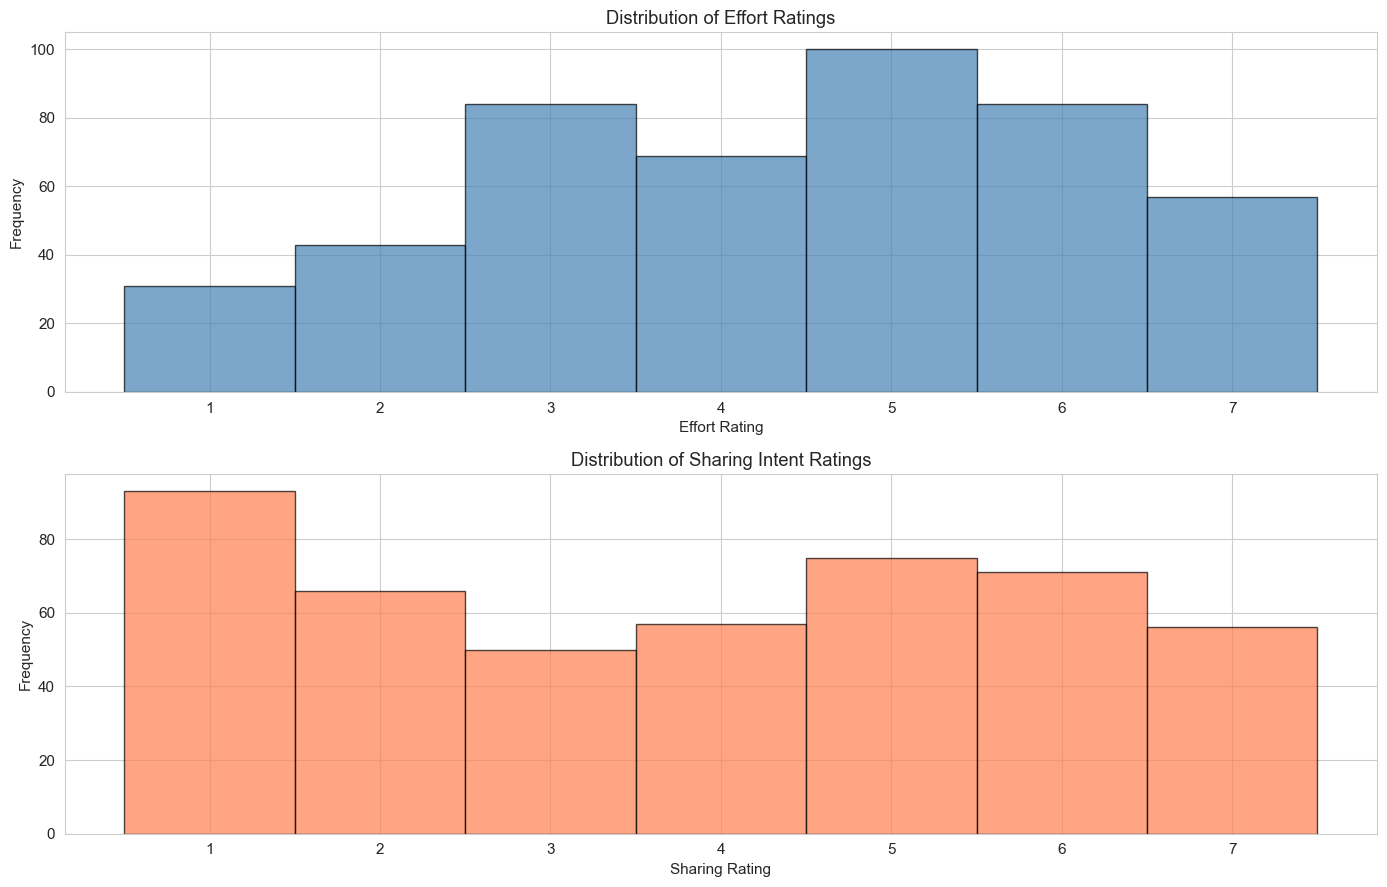

Saved: dv_distributions.png


In [13]:
# Distribution of ratings
fig, axes = plt.subplots(2, 1, figsize=(14, 9))

# Effort ratings
axes[0].hist(merged_df['effort_rating'], bins=7, range=(0.5, 7.5), 
             color='steelblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Effort Rating')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Effort Ratings')
axes[0].set_xticks(range(1, 8))

# Sharing ratings
axes[1].hist(merged_df['sharing_rating'], bins=7, range=(0.5, 7.5),
             color='coral', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Sharing Rating')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Sharing Intent Ratings')
axes[1].set_xticks(range(1, 8))

plt.tight_layout()
plt.savefig('figures/dv_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: dv_distributions.png")

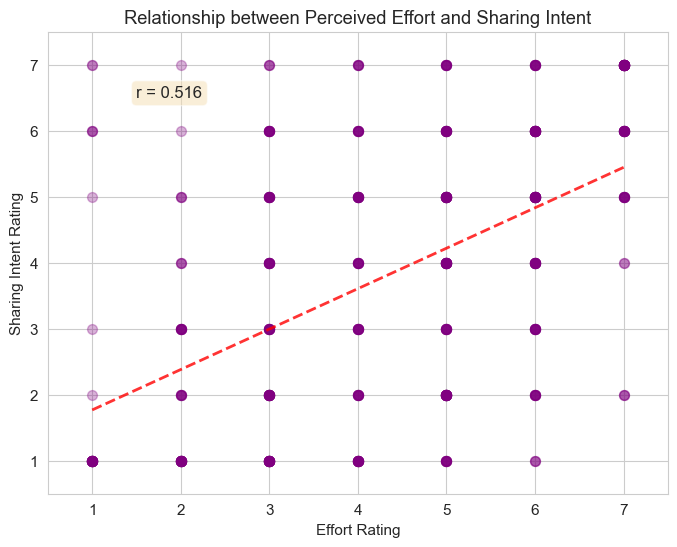

Saved: effort_sharing_correlation.png


In [14]:
# Scatterplot: Effort vs Sharing
plt.figure(figsize=(8, 6))
plt.scatter(merged_df['effort_rating'], merged_df['sharing_rating'], 
            alpha=0.3, s=50, color='purple')
plt.xlabel('Effort Rating')
plt.ylabel('Sharing Intent Rating')
plt.title('Relationship between Perceived Effort and Sharing Intent')
plt.xlim(0.5, 7.5)
plt.ylim(0.5, 7.5)

# Add regression line
z = np.polyfit(merged_df['effort_rating'], merged_df['sharing_rating'], 1)
p = np.poly1d(z)
plt.plot([1, 7], [p(1), p(7)], "r--", alpha=0.8, linewidth=2)

# Add correlation
corr = merged_df[['effort_rating', 'sharing_rating']].corr().iloc[0, 1]
plt.text(1.5, 6.5, f'r = {corr:.3f}', fontsize=12, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.savefig('figures/effort_sharing_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: effort_sharing_correlation.png")

---
## 8. Main Analysis 1: Image Origin Effect

In [15]:
print("=" * 60)
print("ANALYSIS 1: IMAGE ORIGIN EFFECT (AI vs REAL)")
print("=" * 60)

# Compare AI vs Real images (when correctly labeled only)
correct_labels_only = merged_df[merged_df['label_correct'] == True]

ai_images = correct_labels_only[correct_labels_only['true_origin'] == 'AI']
real_images = correct_labels_only[correct_labels_only['true_origin'] == 'Real']

print(f"\nAI Images (correctly labeled): {len(ai_images)} observations")
print(f"Real Images (correctly labeled): {len(real_images)} observations")

# Descriptive stats
print("\n--- EFFORT RATINGS ---")
print(f"AI Images:   M = {ai_images['effort_rating'].mean():.2f}, SD = {ai_images['effort_rating'].std():.2f}")
print(f"Real Images: M = {real_images['effort_rating'].mean():.2f}, SD = {real_images['effort_rating'].std():.2f}")

print("\n--- SHARING RATINGS ---")
print(f"AI Images:   M = {ai_images['sharing_rating'].mean():.2f}, SD = {ai_images['sharing_rating'].std():.2f}")
print(f"Real Images: M = {real_images['sharing_rating'].mean():.2f}, SD = {real_images['sharing_rating'].std():.2f}")

# Paired t-tests
participant_origin = correct_labels_only.groupby(['email', 'true_origin']).agg({
    'effort_rating': 'mean',
    'sharing_rating': 'mean'
}).reset_index()

effort_origin_pivot = participant_origin.pivot(index='email', columns='true_origin', values='effort_rating').dropna()
sharing_origin_pivot = participant_origin.pivot(index='email', columns='true_origin', values='sharing_rating').dropna()

effort_origin_t, effort_origin_p = ttest_rel(effort_origin_pivot['AI'], effort_origin_pivot['Real'])
sharing_origin_t, sharing_origin_p = ttest_rel(sharing_origin_pivot['AI'], sharing_origin_pivot['Real'])

print("\n--- PAIRED T-TESTS ---")
print(f"Effort:  t = {effort_origin_t:.3f}, p = {effort_origin_p:.4f}")
print(f"Sharing: t = {sharing_origin_t:.3f}, p = {sharing_origin_p:.4f}")

# Cohen's d_z (appropriate for within-subjects design)
diff_effort = effort_origin_pivot['AI'] - effort_origin_pivot['Real']
diff_sharing = sharing_origin_pivot['AI'] - sharing_origin_pivot['Real']

effort_origin_d = diff_effort.mean() / diff_effort.std(ddof=1)
sharing_origin_d = diff_sharing.mean() / diff_sharing.std(ddof=1)

print("\n--- EFFECT SIZES (Cohen's d_z for paired samples) ---")
print(f"Effort:  d_z = {effort_origin_d:.3f}")
print(f"Sharing: d_z = {sharing_origin_d:.3f}")

ANALYSIS 1: IMAGE ORIGIN EFFECT (AI vs REAL)

AI Images (correctly labeled): 117 observations
Real Images (correctly labeled): 117 observations

--- EFFORT RATINGS ---
AI Images:   M = 3.85, SD = 1.66
Real Images: M = 4.91, SD = 1.69

--- SHARING RATINGS ---
AI Images:   M = 3.38, SD = 2.12
Real Images: M = 4.21, SD = 2.04

--- PAIRED T-TESTS ---
Effort:  t = -5.262, p = 0.0000
Sharing: t = -3.681, p = 0.0004

--- EFFECT SIZES (Cohen's d_z for paired samples) ---
Effort:  d_z = -0.486
Sharing: d_z = -0.340


In [16]:
# Create a 4-level condition factor
def condition_label(row):
    if row["true_origin"] == "AI" and row["label_correct"]:
        return "AI_Correct"
    elif row["true_origin"] == "AI" and not row["label_correct"]:
        return "AI_Mislabel"
    elif row["true_origin"] == "Real" and row["label_correct"]:
        return "Real_Correct"
    else:
        return "Real_Mislabel"


merged_df["condition"] = merged_df.apply(condition_label, axis=1)
merged_df["condition"] = merged_df["condition"].astype("category")


def cohens_dz(diff_scores):
    return diff_scores.mean() / diff_scores.std(ddof=1)


# constrast 1
ai_data = merged_df[merged_df["true_origin"] == "AI"]

ai_pivot_effort = ai_data.pivot(
    index="email", columns="label_correct", values="effort_rating"
).dropna()
ai_pivot_sharing = ai_data.pivot(
    index="email", columns="label_correct", values="sharing_rating"
).dropna()

effort_diff_ai = ai_pivot_effort[True] - ai_pivot_effort[False]
sharing_diff_ai = ai_pivot_sharing[True] - ai_pivot_sharing[False]

print("\nAI: Correct vs Mislabel")
print(f"Effort dz = {cohens_dz(effort_diff_ai):.3f}")
print(f"Sharing dz = {cohens_dz(sharing_diff_ai):.3f}")

# contrast 2
real_data = merged_df[merged_df["true_origin"] == "Real"]

real_pivot_effort = real_data.pivot(
    index="email", columns="label_correct", values="effort_rating"
).dropna()
real_pivot_sharing = real_data.pivot(
    index="email", columns="label_correct", values="sharing_rating"
).dropna()

effort_diff_real = real_pivot_effort[True] - real_pivot_effort[False]
sharing_diff_real = real_pivot_sharing[True] - real_pivot_sharing[False]

print("\nReal: Correct vs Mislabel")
print(f"Effort dz = {cohens_dz(effort_diff_real):.3f}")
print(f"Sharing dz = {cohens_dz(sharing_diff_real):.3f}")

# constrast 3
misinfo_effort = merged_df.pivot(
    index="email", columns="condition", values="effort_rating"
)[["AI_Mislabel", "Real_Correct"]].dropna()

misinfo_sharing = merged_df.pivot(
    index="email", columns="condition", values="sharing_rating"
)[["AI_Mislabel", "Real_Correct"]].dropna()

effort_diff_misinfo = misinfo_effort["AI_Mislabel"] - misinfo_effort["Real_Correct"]
sharing_diff_misinfo = misinfo_sharing["AI_Mislabel"] - misinfo_sharing["Real_Correct"]

print("\nAI-Mislabel vs Real-Correct (Critical Contrast)")
print(f"Effort dz = {cohens_dz(effort_diff_misinfo):.3f}")
print(f"Sharing dz = {cohens_dz(sharing_diff_misinfo):.3f}")


AI: Correct vs Mislabel
Effort dz = -0.393
Sharing dz = -0.303

Real: Correct vs Mislabel
Effort dz = 0.416
Sharing dz = 0.248

AI-Mislabel vs Real-Correct (Critical Contrast)
Effort dz = -0.054
Sharing dz = -0.015


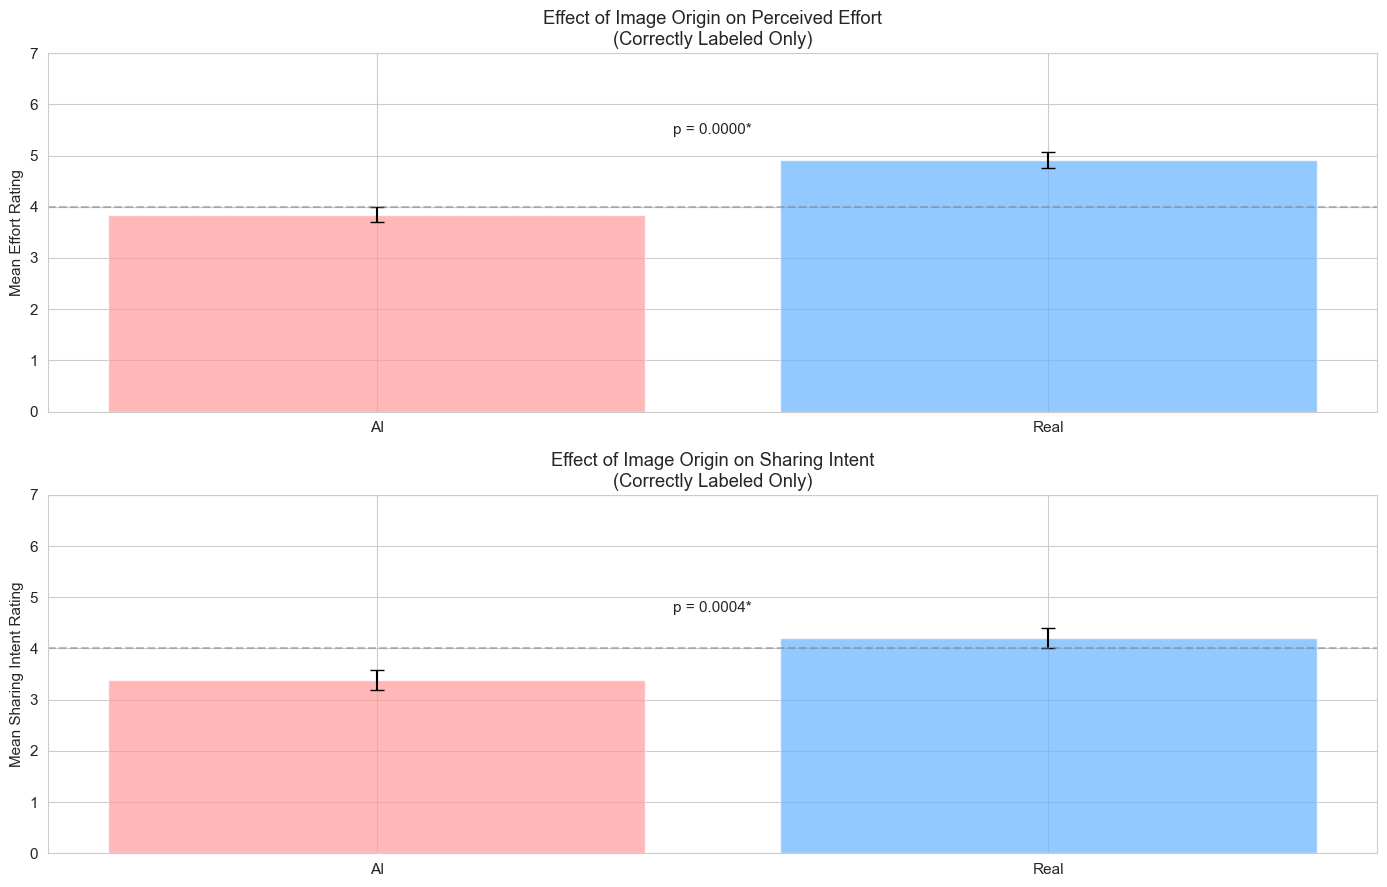

Saved: image_origin_effect.png


In [17]:
# Visualization: Image Origin Effect
fig, axes = plt.subplots(2, 1, figsize=(14, 9))

# Effort
data_effort_origin = correct_labels_only.groupby('true_origin')['effort_rating'].agg(['mean', 'sem']).reset_index()

axes[0].bar(data_effort_origin['true_origin'], data_effort_origin['mean'],
            yerr=data_effort_origin['sem'], capsize=5, color=['#ff9999', '#66b3ff'], alpha=0.7)
axes[0].set_ylabel('Mean Effort Rating')
axes[0].set_title('Effect of Image Origin on Perceived Effort\n(Correctly Labeled Only)')
axes[0].set_ylim(0, 7)
axes[0].axhline(y=4, color='gray', linestyle='--', alpha=0.5)

if effort_origin_p < 0.05:
    axes[0].text(0.5, max(data_effort_origin['mean']) + 0.5,
                 f'p = {effort_origin_p:.4f}*', ha='center', fontsize=11)

# Sharing
data_sharing_origin = correct_labels_only.groupby('true_origin')['sharing_rating'].agg(['mean', 'sem']).reset_index()

axes[1].bar(data_sharing_origin['true_origin'], data_sharing_origin['mean'],
            yerr=data_sharing_origin['sem'], capsize=5, color=['#ff9999', '#66b3ff'], alpha=0.7)
axes[1].set_ylabel('Mean Sharing Intent Rating')
axes[1].set_title('Effect of Image Origin on Sharing Intent\n(Correctly Labeled Only)')
axes[1].set_ylim(0, 7)
axes[1].axhline(y=4, color='gray', linestyle='--', alpha=0.5)

if sharing_origin_p < 0.05:
    axes[1].text(0.5, max(data_sharing_origin['mean']) + 0.5,
                 f'p = {sharing_origin_p:.4f}*', ha='center', fontsize=11)

plt.tight_layout()
plt.savefig('figures/image_origin_effect.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: image_origin_effect.png")

---
## 9. Main Analysis 2: Specific Mislabel Types

In [18]:
print("=" * 60)
print("ANALYSIS 2: SPECIFIC MISLABEL EFFECTS")
print("=" * 60)

# Break down by all 4 conditions
condition_stats = merged_df.groupby('condition_code').agg({
    'effort_rating': ['mean', 'std', 'count'],
    'sharing_rating': ['mean', 'std', 'count']
})

print("\n--- DESCRIPTIVE STATISTICS BY CONDITION ---")
print(condition_stats)

# Focus on mislabel comparisons
print("\n--- MISLABEL COMPARISONS ---")

fp_data = merged_df[merged_df['condition_code'] == 'FP']  # Real called AI
fn_data = merged_df[merged_df['condition_code'] == 'FN']  # AI called Real
tp_data = merged_df[merged_df['condition_code'] == 'TP']  # AI called AI (correct)
tn_data = merged_df[merged_df['condition_code'] == 'TN']  # Real called Real (correct)

print("\nFalse Positive (Real → AI label):")
print(f"  Effort:  M = {fp_data['effort_rating'].mean():.2f}, SD = {fp_data['effort_rating'].std():.2f}")
print(f"  Sharing: M = {fp_data['sharing_rating'].mean():.2f}, SD = {fp_data['sharing_rating'].std():.2f}")

print("\nFalse Negative (AI → Real label):")
print(f"  Effort:  M = {fn_data['effort_rating'].mean():.2f}, SD = {fn_data['effort_rating'].std():.2f}")
print(f"  Sharing: M = {fn_data['sharing_rating'].mean():.2f}, SD = {fn_data['sharing_rating'].std():.2f}")

print("\nTrue Positive (AI → AI label):")
print(f"  Effort:  M = {tp_data['effort_rating'].mean():.2f}, SD = {tp_data['effort_rating'].std():.2f}")
print(f"  Sharing: M = {tp_data['sharing_rating'].mean():.2f}, SD = {tp_data['sharing_rating'].std():.2f}")

print("\nTrue Negative (Real → Real label):")
print(f"  Effort:  M = {tn_data['effort_rating'].mean():.2f}, SD = {tn_data['effort_rating'].std():.2f}")
print(f"  Sharing: M = {tn_data['sharing_rating'].mean():.2f}, SD = {tn_data['sharing_rating'].std():.2f}")

ANALYSIS 2: SPECIFIC MISLABEL EFFECTS

--- DESCRIPTIVE STATISTICS BY CONDITION ---
               effort_rating                 sharing_rating                
                        mean       std count           mean       std count
condition_code                                                             
FN                  4.803419  1.593301   117       4.170940  1.913160   117
FP                  3.940171  1.763082   117       3.598291  2.101148   117
TN                  4.914530  1.694681   117       4.205128  2.044920   117
TP                  3.846154  1.658912   117       3.376068  2.116139   117

--- MISLABEL COMPARISONS ---

False Positive (Real → AI label):
  Effort:  M = 3.94, SD = 1.76
  Sharing: M = 3.60, SD = 2.10

False Negative (AI → Real label):
  Effort:  M = 4.80, SD = 1.59
  Sharing: M = 4.17, SD = 1.91

True Positive (AI → AI label):
  Effort:  M = 3.85, SD = 1.66
  Sharing: M = 3.38, SD = 2.12

True Negative (Real → Real label):
  Effort:  M = 4.91, SD = 1.69


In [19]:
# Repeated measures ANOVA for condition effect
print("\n--- REPEATED MEASURES ANOVA ---")

# Prepare data for ANOVA
anova_data = merged_df[['email', 'condition_code', 'effort_rating', 'sharing_rating']].copy()

try:
    # Effort ANOVA
    aovrm_effort = AnovaRM(anova_data, 'effort_rating', 'email', within=['condition_code'])
    res_effort = aovrm_effort.fit()
    print("\nEffort Rating:")
    print(res_effort)
except Exception as e:
    print(f"\nEffort ANOVA error: {e}")

try:
    # Sharing ANOVA
    aovrm_sharing = AnovaRM(anova_data, 'sharing_rating', 'email', within=['condition_code'])
    res_sharing = aovrm_sharing.fit()
    print("\nSharing Rating:")
    print(res_sharing)
except Exception as e:
    print(f"\nSharing ANOVA error: {e}")


--- REPEATED MEASURES ANOVA ---

Effort Rating:
                    Anova
               F Value Num DF  Den DF  Pr > F
---------------------------------------------
condition_code 15.1232 3.0000 348.0000 0.0000


Sharing Rating:
                    Anova
               F Value Num DF  Den DF  Pr > F
---------------------------------------------
condition_code  6.5782 3.0000 348.0000 0.0002



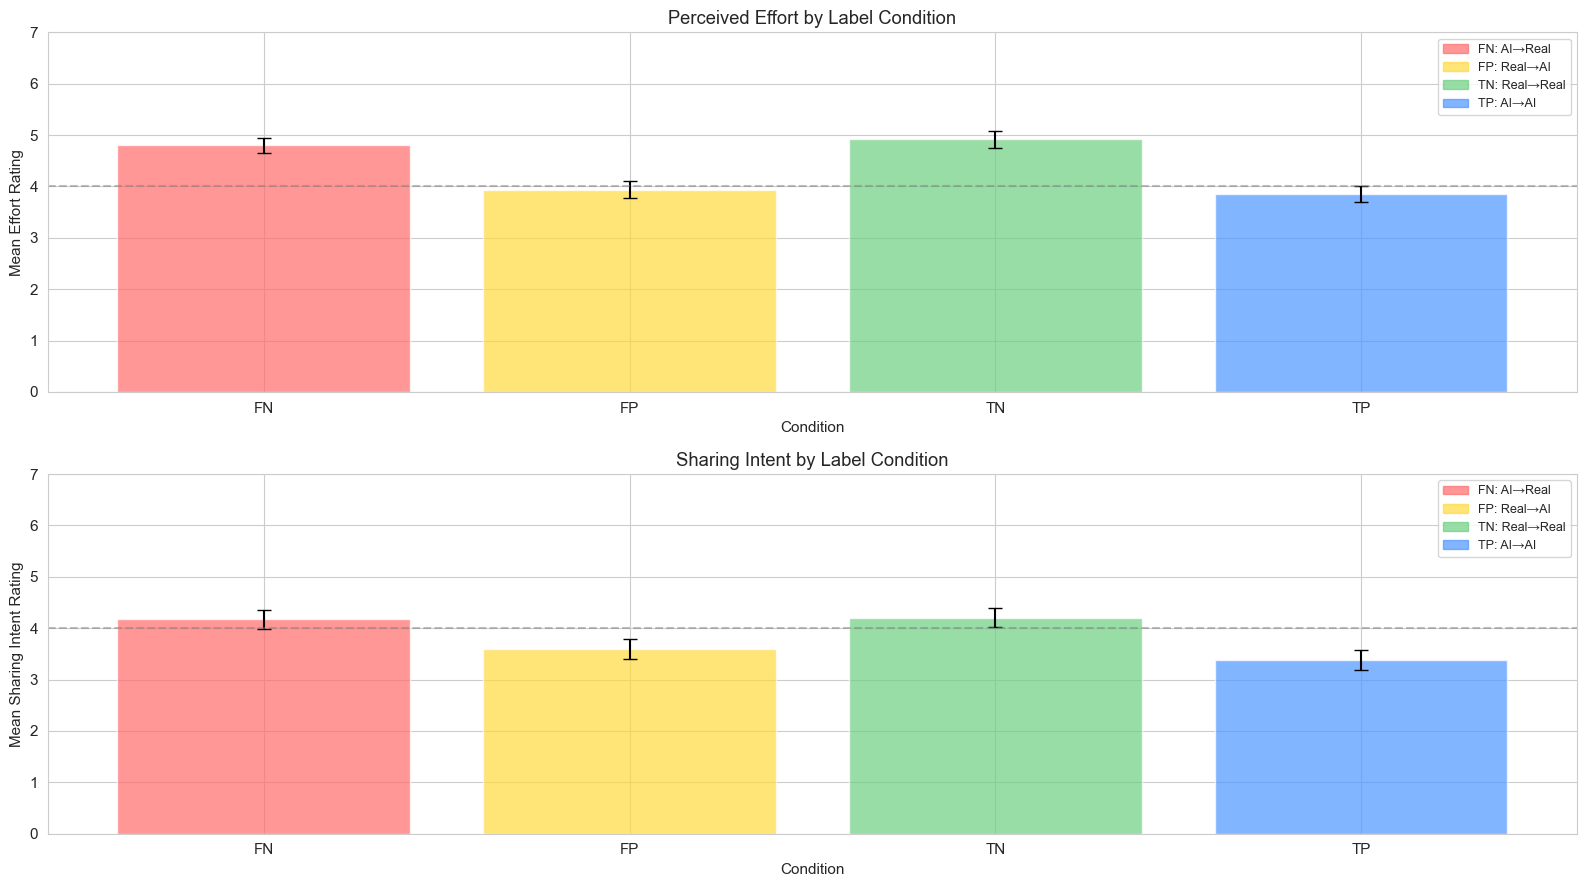

Saved: all_conditions_comparison.png


In [20]:
# Visualization: All 4 conditions
fig, axes = plt.subplots(2, 1, figsize=(16, 9))

# Effort by condition
data_effort_cond = merged_df.groupby('condition_code')['effort_rating'].agg(['mean', 'sem']).reset_index()
data_effort_cond = data_effort_cond.sort_values('condition_code')  # FN, FP, TN, TP

colors = ['#ff6b6b', '#ffd93d', '#6bcf7f', '#4d96ff']  # FN, FP, TN, TP
axes[0].bar(data_effort_cond['condition_code'], data_effort_cond['mean'],
            yerr=data_effort_cond['sem'], capsize=5, color=colors, alpha=0.7)
axes[0].set_ylabel('Mean Effort Rating')
axes[0].set_xlabel('Condition')
axes[0].set_title('Perceived Effort by Label Condition')
axes[0].set_ylim(0, 7)
axes[0].axhline(y=4, color='gray', linestyle='--', alpha=0.5)

# Add legend
legend_labels = ['FN: AI→Real', 'FP: Real→AI', 'TN: Real→Real', 'TP: AI→AI']
axes[0].legend([plt.Rectangle((0,0),1,1, color=c, alpha=0.7) for c in colors], 
               legend_labels, loc='upper right', fontsize=9)

# Sharing by condition
data_sharing_cond = merged_df.groupby('condition_code')['sharing_rating'].agg(['mean', 'sem']).reset_index()
data_sharing_cond = data_sharing_cond.sort_values('condition_code')

axes[1].bar(data_sharing_cond['condition_code'], data_sharing_cond['mean'],
            yerr=data_sharing_cond['sem'], capsize=5, color=colors, alpha=0.7)
axes[1].set_ylabel('Mean Sharing Intent Rating')
axes[1].set_xlabel('Condition')
axes[1].set_title('Sharing Intent by Label Condition')
axes[1].set_ylim(0, 7)
axes[1].axhline(y=4, color='gray', linestyle='--', alpha=0.5)

axes[1].legend([plt.Rectangle((0,0),1,1, color=c, alpha=0.7) for c in colors],
               legend_labels, loc='upper right', fontsize=9)

plt.tight_layout()
plt.savefig('figures/all_conditions_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: all_conditions_comparison.png")

---
## 10. Interaction Analysis: Origin × Label Correctness

In [21]:
print("=" * 60)
print("ANALYSIS 3: INTERACTION (ORIGIN × LABEL CORRECTNESS)")
print("=" * 60)

# 2x2 design: Origin (AI/Real) × Label Correctness (True/False)
interaction_stats = merged_df.groupby(['true_origin', 'label_correct']).agg({
    'effort_rating': ['mean', 'std', 'count'],
    'sharing_rating': ['mean', 'std', 'count']
})

print("\n--- DESCRIPTIVE STATISTICS ---")
print(interaction_stats)

# Two-way repeated measures ANOVA
print("\n--- TWO-WAY REPEATED MEASURES ANOVA ---")

try:
    # Effort
    aovrm_int_effort = AnovaRM(merged_df, 'effort_rating', 'email', 
                                within=['true_origin', 'label_correct'])
    res_int_effort = aovrm_int_effort.fit()
    print("\nEffort Rating:")
    print(res_int_effort)
except Exception as e:
    print(f"\nEffort interaction ANOVA error: {e}")

try:
    # Sharing
    aovrm_int_sharing = AnovaRM(merged_df, 'sharing_rating', 'email',
                                 within=['true_origin', 'label_correct'])
    res_int_sharing = aovrm_int_sharing.fit()
    print("\nSharing Rating:")
    print(res_int_sharing)
except Exception as e:
    print(f"\nSharing interaction ANOVA error: {e}")

ANALYSIS 3: INTERACTION (ORIGIN × LABEL CORRECTNESS)

--- DESCRIPTIVE STATISTICS ---
                          effort_rating                 sharing_rating  \
                                   mean       std count           mean   
true_origin label_correct                                                
AI          False              4.803419  1.593301   117       4.170940   
            True               3.846154  1.658912   117       3.376068   
Real        False              3.940171  1.763082   117       3.598291   
            True               4.914530  1.694681   117       4.205128   

                                           
                                std count  
true_origin label_correct                  
AI          False          1.913160   117  
            True           2.116139   117  
Real        False          2.101148   117  
            True           2.044920   117  

--- TWO-WAY REPEATED MEASURES ANOVA ---

Effort Rating:
                         Anova


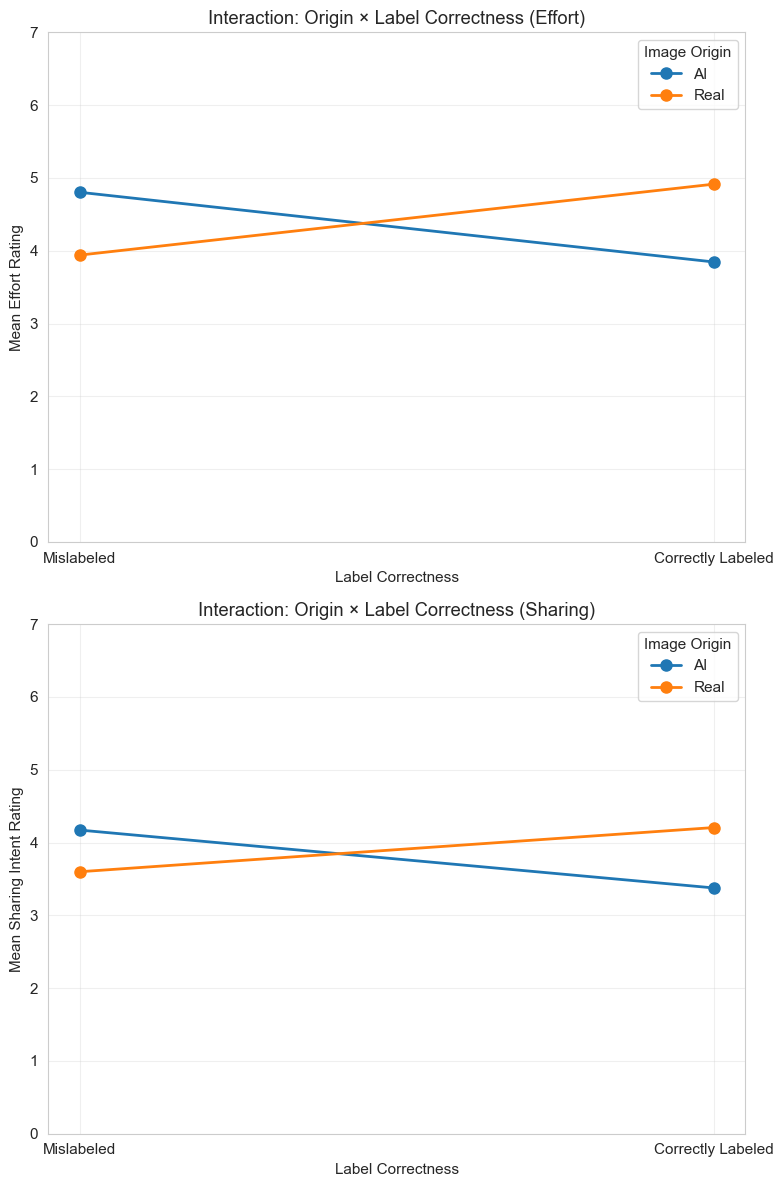

Saved: interaction_plot.png


In [22]:
# Interaction plot
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Effort interaction
interaction_effort = merged_df.groupby(['true_origin', 'label_correct'])['effort_rating'].mean().reset_index()
interaction_effort_pivot = interaction_effort.pivot(index='label_correct', 
                                                     columns='true_origin', 
                                                     values='effort_rating')

interaction_effort_pivot.plot(ax=axes[0], marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('Label Correctness')
axes[0].set_ylabel('Mean Effort Rating')
axes[0].set_title('Interaction: Origin × Label Correctness (Effort)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Mislabeled', 'Correctly Labeled'])
axes[0].legend(title='Image Origin', loc='best')
axes[0].set_ylim(0, 7)
axes[0].grid(True, alpha=0.3)

# Sharing interaction
interaction_sharing = merged_df.groupby(['true_origin', 'label_correct'])['sharing_rating'].mean().reset_index()
interaction_sharing_pivot = interaction_sharing.pivot(index='label_correct',
                                                       columns='true_origin',
                                                       values='sharing_rating')

interaction_sharing_pivot.plot(ax=axes[1], marker='o', linewidth=2, markersize=8)
axes[1].set_xlabel('Label Correctness')
axes[1].set_ylabel('Mean Sharing Intent Rating')
axes[1].set_title('Interaction: Origin × Label Correctness (Sharing)')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Mislabeled', 'Correctly Labeled'])
axes[1].legend(title='Image Origin', loc='best')
axes[1].set_ylim(0, 7)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/interaction_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: interaction_plot.png")

---
## 11. Linear Mixed Effects Models (Robustness Check)
To validate our repeated measures ANOVA findings, we fit linear mixed effects models (LMM) that account for random variation across participants.

LMMs provide:
1. More flexible modeling of variance components
2. Ability to handle unbalanced designs (images seen different numbers of times)
3. Estimates of participant and image-level variability
4. Confirmation that main effects hold after accounting for random effects

In [23]:
print("=" * 60)
print("LINEAR MIXED EFFECTS MODELS")
print("=" * 60)

# Prepare data: create numeric coding for categorical variables
merged_df['origin_numeric'] = (merged_df['true_origin'] == 'Real').astype(int)  # 0=AI, 1=Real
merged_df['label_correct_numeric'] = merged_df['label_correct'].astype(int)  # 0=False, 1=True

# Create interaction term
merged_df['origin_x_label'] = merged_df['origin_numeric'] * merged_df['label_correct_numeric']

# Standardize AI familiarity for easier interpretation
merged_df['ai_familiarity_z'] = (merged_df['ai_familiarity'] - merged_df['ai_familiarity'].mean()) / merged_df['ai_familiarity'].std()

print("\nVariable Coding:")
print("- origin_numeric: 0 = AI, 1 = Real")
print("- label_correct_numeric: 0 = Mislabeled, 1 = Correct")
print("- ai_familiarity_z: Standardized (M=0, SD=1)")

LINEAR MIXED EFFECTS MODELS

Variable Coding:
- origin_numeric: 0 = AI, 1 = Real
- label_correct_numeric: 0 = Mislabeled, 1 = Correct
- ai_familiarity_z: Standardized (M=0, SD=1)


### Basic Model with Participant Random Intercept

This model tests fixed effects of origin, label correctness, and their interaction, 
with random intercepts for participants.

In [24]:
print("\n" + "=" * 60)
print("PARTICIPANT RANDOM INTERCEPT")
print("=" * 60)

# Print variable coding explanation
print("\nVariable Coding:")
print("- origin_numeric: 0 = AI, 1 = Real")
print("- label_correct_numeric: 0 = Mislabeled, 1 = Correct")
print("- origin_x_label: Interaction term (origin × label_correct)")
print("- ai_familiarity_z: Standardized AI familiarity (M=0, SD=1)")
print("- Random intercept: Each participant gets their own baseline")
print()

# Effort Rating Model
print("\n--- EFFORT RATING ---")
model1_effort = smf.mixedlm(
    "effort_rating ~ origin_numeric + label_correct_numeric + origin_x_label + ai_familiarity_z",
    data=merged_df,
    groups=merged_df["email"],
    re_formula="1"  # Random intercept only
)
result1_effort = model1_effort.fit(method='nm')
print(result1_effort.summary())

print("\nInterpretation Guide (Effort):")
print("- Intercept: Predicted rating for AI (0), mislabeled (0), avg familiarity (0)")
print("- origin_numeric: Change when going from AI→Real (holding label constant)")
print("- label_correct_numeric: Change when going from mislabeled→correct (for AI images)")
print("- origin_x_label: INTERACTION - how label effect differs for Real vs AI images")
print("- ai_familiarity_z: Effect of 1 SD increase in AI familiarity")
print("- Group Var: Variance of participant baselines (SD = {:.2f})".format(result1_effort.cov_re.iloc[0,0]**0.5))

# Sharing Rating Model  
print("\n--- SHARING RATING ---")
model1_sharing = smf.mixedlm(
    "sharing_rating ~ origin_numeric + label_correct_numeric + origin_x_label + ai_familiarity_z",
    data=merged_df,
    groups=merged_df["email"],
    re_formula="1"
)
result1_sharing = model1_sharing.fit(method='nm')
print(result1_sharing.summary())

print("\nInterpretation Guide (Sharing):")
print("- Intercept: Predicted rating for AI (0), mislabeled (0), avg familiarity (0)")
print("- origin_numeric: Change when going from AI→Real (holding label constant)")
print("- label_correct_numeric: Change when going from mislabeled→correct (for AI images)")
print("- origin_x_label: INTERACTION - how label effect differs for Real vs AI images")
print("- ai_familiarity_z: Effect of 1 SD increase in AI familiarity")
print("- Group Var: Variance of participant baselines (SD = {:.2f})".format(result1_sharing.cov_re.iloc[0,0]**0.5))

# Summary of key findings
print("\n" + "=" * 60)
print("KEY FINDINGS SUMMARY FROM LMM")
print("=" * 60)
print("\n--- EFFORT RATING ---")
print(f"Intercept: β = {result1_effort.params['Intercept']:.3f}, p = {result1_effort.pvalues['Intercept']:.4f}")
print(f"Origin (Real vs AI): β = {result1_effort.params['origin_numeric']:.3f}, p = {result1_effort.pvalues['origin_numeric']:.4f}")
print(f"Label Correct: β = {result1_effort.params['label_correct_numeric']:.3f}, p = {result1_effort.pvalues['label_correct_numeric']:.4f}")
print(f"Origin × Label INTERACTION: β = {result1_effort.params['origin_x_label']:.3f}, p = {result1_effort.pvalues['origin_x_label']:.4f} ***")
print(f"AI Familiarity: β = {result1_effort.params['ai_familiarity_z']:.3f}, p = {result1_effort.pvalues['ai_familiarity_z']:.4f}")

print("\n--- SHARING RATING ---")
print(f"Intercept: β = {result1_sharing.params['Intercept']:.3f}, p = {result1_sharing.pvalues['Intercept']:.4f}")
print(f"Origin (Real vs AI): β = {result1_sharing.params['origin_numeric']:.3f}, p = {result1_sharing.pvalues['origin_numeric']:.4f}")
print(f"Label Correct: β = {result1_sharing.params['label_correct_numeric']:.3f}, p = {result1_sharing.pvalues['label_correct_numeric']:.4f}")
print(f"Origin × Label INTERACTION: β = {result1_sharing.params['origin_x_label']:.3f}, p = {result1_sharing.pvalues['origin_x_label']:.4f} ***")
print(f"AI Familiarity: β = {result1_sharing.params['ai_familiarity_z']:.3f}, p = {result1_sharing.pvalues['ai_familiarity_z']:.4f}")

print("=" * 60)
print("INTERPRETATION")
print("=" * 60)
print("The significant interaction effects confirm ANOVA results:")
print("- Label effects differ based on image origin")
print("- Mislabeling AI as Real boosts ratings")
print("- Mislabeling Real as AI reduces ratings")
print("Random effects show moderate between-participant variance,")
print("suggesting individual differences in baseline ratings but")
print("consistent label effects across participants.")


PARTICIPANT RANDOM INTERCEPT

Variable Coding:
- origin_numeric: 0 = AI, 1 = Real
- label_correct_numeric: 0 = Mislabeled, 1 = Correct
- origin_x_label: Interaction term (origin × label_correct)
- ai_familiarity_z: Standardized AI familiarity (M=0, SD=1)
- Random intercept: Each participant gets their own baseline


--- EFFORT RATING ---
             Mixed Linear Model Regression Results
Model:               MixedLM  Dependent Variable:  effort_rating
No. Observations:    468      Method:              REML         
No. Groups:          117      Scale:               2.4329       
Min. group size:     4        Log-Likelihood:      -902.9574    
Max. group size:     4        Converged:           Yes          
Mean group size:     4.0                                        
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept              

### Interpretation Guide

**Fixed Effects Coefficients:**
- **origin_numeric**: Effect of being Real (vs AI) image
- **label_correct_numeric**: Effect of correct (vs incorrect) label
- **origin_x_label**: Interaction effect (key finding)
- **ai_familiarity_z**: Effect of AI expertise

**Random Effects:**
- **Group Var**: Between-participant variance
- **Residual**: Within-participant variance

**Model Comparison:**
LMM results should align with ANOVA findings. The interaction term (origin_x_label) 
should be significant, confirming the crossover pattern.

---
### Variance Partitioning

Understanding how much variance is due to participants vs. residual error.

In [25]:
print("\n" + "=" * 60)
print("VARIANCE DECOMPOSITION")
print("=" * 60)

# Extract variance components from Model 1
effort_group_var = result1_effort.cov_re.iloc[0, 0]  # Between-participant variance
effort_residual_var = result1_effort.scale  # Within-participant (residual) variance
effort_total_var = effort_group_var + effort_residual_var
effort_icc = effort_group_var / effort_total_var  # Intraclass correlation

sharing_group_var = result1_sharing.cov_re.iloc[0, 0]
sharing_residual_var = result1_sharing.scale
sharing_total_var = sharing_group_var + sharing_residual_var
sharing_icc = sharing_group_var / sharing_total_var

print("\n--- EFFORT RATING ---")
print(f"Between-Participant Variance: {effort_group_var:.3f}")
print(f"Within-Participant Variance: {effort_residual_var:.3f}")
print(f"Total Variance: {effort_total_var:.3f}")
print(f"ICC (Intraclass Correlation): {effort_icc:.3f}")
print(f"  → {effort_icc*100:.1f}% of variance is between participants")
print(f"  → {(1-effort_icc)*100:.1f}% is within participants (our manipulation)")

print("\n--- SHARING RATING ---")
print(f"Between-Participant Variance: {sharing_group_var:.3f}")
print(f"Within-Participant Variance: {sharing_residual_var:.3f}")
print(f"Total Variance: {sharing_total_var:.3f}")
print(f"ICC (Intraclass Correlation): {sharing_icc:.3f}")
print(f"  → {sharing_icc*100:.1f}% of variance is between participants")
print(f"  → {(1-sharing_icc)*100:.1f}% is within participants (our manipulation)")
print("\n" + "=" * 60)



VARIANCE DECOMPOSITION

--- EFFORT RATING ---
Between-Participant Variance: 0.374
Within-Participant Variance: 2.433
Total Variance: 2.807
ICC (Intraclass Correlation): 0.133
  → 13.3% of variance is between participants
  → 86.7% is within participants (our manipulation)

--- SHARING RATING ---
Between-Participant Variance: 1.043
Within-Participant Variance: 3.062
Total Variance: 4.105
ICC (Intraclass Correlation): 0.254
  → 25.4% of variance is between participants
  → 74.6% is within participants (our manipulation)



In [26]:
# Full model (fixed + random effects)
full_model = smf.mixedlm(
    "effort_rating ~ origin_numeric * label_correct_numeric + ai_familiarity_z",
    merged_df,
    groups=merged_df["email"]
).fit()

# Null model (random effects only)
null_model = smf.mixedlm(
    "effort_rating ~ 1",
    merged_df,
    groups=merged_df["email"]
).fit()

# Random intercept variance
var_random = full_model.cov_re.iloc[0, 0]

# Residual variance
var_residual = full_model.scale

# Predicted values from fixed effects only
X = full_model.model.exog
beta = full_model.fe_params.values
fixed_effect_prediction = X @ beta

var_fixed = np.var(fixed_effect_prediction)

# Marginal R² (fixed effects only)
R2_marginal = var_fixed / (var_fixed + var_random + var_residual)

# Conditional R² (fixed + random effects)
R2_conditional = (var_fixed + var_random) / (var_fixed + var_random + var_residual)

print(f"Marginal R²: {R2_marginal:.3f}")
print(f"Conditional R²: {R2_conditional:.3f}")


Marginal R²: 0.083
Conditional R²: 0.205


In [27]:
# Full model (fixed + random effects)
full_model = smf.mixedlm(
    "sharing_rating ~ origin_numeric * label_correct_numeric + ai_familiarity_z",
    merged_df,
    groups=merged_df["email"]
).fit()

# Null model (random effects only)
null_model = smf.mixedlm(
    "sharing_rating ~ 1",
    merged_df,
    groups=merged_df["email"]
).fit()

# Random intercept variance
var_random = full_model.cov_re.iloc[0, 0]

# Residual variance
var_residual = full_model.scale

# Predicted values from fixed effects only
X = full_model.model.exog
beta = full_model.fe_params.values
fixed_effect_prediction = X @ beta

var_fixed = np.var(fixed_effect_prediction)

# Marginal R² (fixed effects only)
R2_marginal = var_fixed / (var_fixed + var_random + var_residual)

# Conditional R² (fixed + random effects)
R2_conditional = (var_fixed + var_random) / (var_fixed + var_random + var_residual)

print(f"Marginal R²: {R2_marginal:.3f}")
print(f"Conditional R²: {R2_conditional:.3f}")


Marginal R²: 0.052
Conditional R²: 0.292


---
## 12. Image-Level Analysis: Mislabel Susceptibility

In [28]:
print("=" * 60)
print("IMAGE-LEVEL ANALYSIS: MISLABEL EFFECTS BY SPECIFIC IMAGE")
print("=" * 60)

# Group by specific image and label correctness
image_analysis = merged_df.groupby(['image_name', 'label_correct']).agg({
    'effort_rating': ['mean', 'std', 'count'],
    'sharing_rating': ['mean', 'std', 'count']
}).round(2)

print("\nRatings by Image and Label Correctness:")
print(image_analysis)

# Calculate mislabel effect for each image
# (Only for images that appear in both conditions)
image_effects = []

for img in merged_df['image_name'].unique():
    img_data = merged_df[merged_df['image_name'] == img]
    
    true_data = img_data[img_data['label_correct'] == True]
    false_data = img_data[img_data['label_correct'] == False]
    
    # Only calculate if image appears in both conditions
    if len(true_data) > 0 and len(false_data) > 0:
        effect_effort = true_data['effort_rating'].mean() - false_data['effort_rating'].mean()
        effect_sharing = true_data['sharing_rating'].mean() - false_data['sharing_rating'].mean()
        
        image_effects.append({
            'image': img,
            'true_origin': img_data['true_origin'].iloc[0],
            'n_true': len(true_data),
            'n_false': len(false_data),
            'effort_effect': effect_effort,
            'sharing_effect': effect_sharing
        })

effects_df = pd.DataFrame(image_effects).sort_values('effort_effect', ascending=False)

print("\n--- MISLABEL EFFECTS BY IMAGE ---")
print("(Positive = True label rated higher, Negative = Mislabel rated higher)")
print(effects_df.to_string(index=False))

IMAGE-LEVEL ANALYSIS: MISLABEL EFFECTS BY SPECIFIC IMAGE

Ratings by Image and Label Correctness:
                               effort_rating             sharing_rating        \
                                        mean   std count           mean   std   
image_name       label_correct                                                  
apples           False                  5.10  1.91    10           3.60  2.22   
                 True                   3.92  1.62    12           3.25  2.01   
cups             False                  3.09  1.45    11           2.45  1.75   
                 True                   4.64  1.98    14           2.79  1.81   
earthquake       False                  4.75  1.98     8           5.00  1.85   
                 True                   2.83  1.64    12           1.83  1.75   
feeding_the_poor False                  3.92  1.12    13           3.85  1.46   
                 True                   2.50  1.38     6           2.17  1.60   
flood      

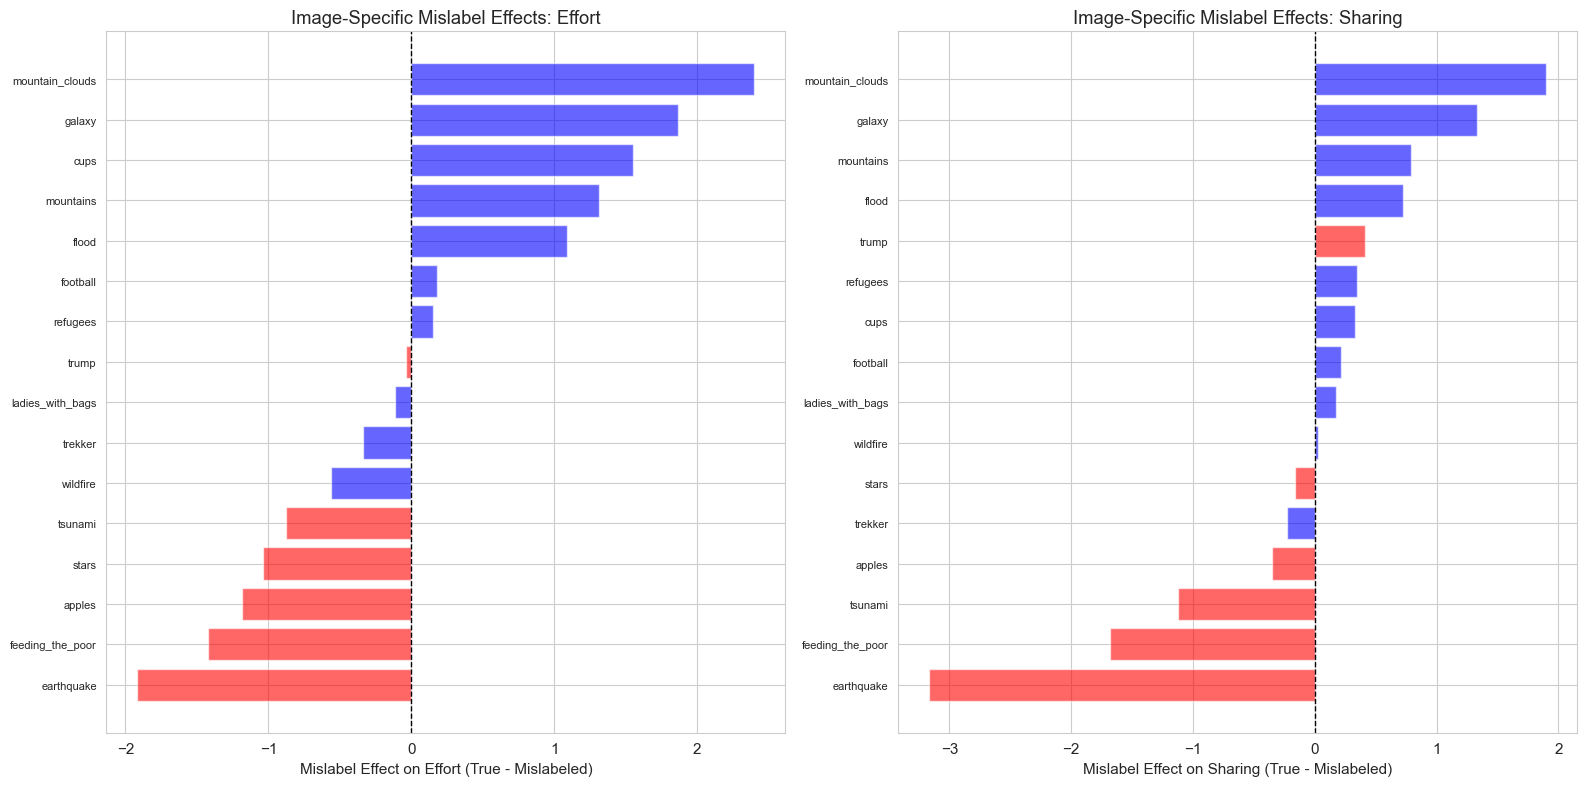

In [29]:
# Visualize which images are most susceptible
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Effort effects
effects_df_sorted = effects_df.sort_values('effort_effect')
colors = ['red' if x == 'AI' else 'blue' for x in effects_df_sorted['true_origin']]

axes[0].barh(range(len(effects_df_sorted)), effects_df_sorted['effort_effect'], color=colors, alpha=0.6)
axes[0].set_yticks(range(len(effects_df_sorted)))
axes[0].set_yticklabels(effects_df_sorted['image'], fontsize=8)
axes[0].set_xlabel('Mislabel Effect on Effort (True - Mislabeled)')
axes[0].set_title('Image-Specific Mislabel Effects: Effort')
axes[0].axvline(0, color='black', linestyle='--', linewidth=1)

# Sharing effects
effects_df_sorted_sharing = effects_df.sort_values('sharing_effect')
colors_sharing = ['red' if x == 'AI' else 'blue' for x in effects_df_sorted_sharing['true_origin']]

axes[1].barh(range(len(effects_df_sorted_sharing)), effects_df_sorted_sharing['sharing_effect'], 
             color=colors_sharing, alpha=0.6)
axes[1].set_yticks(range(len(effects_df_sorted_sharing)))
axes[1].set_yticklabels(effects_df_sorted_sharing['image'], fontsize=8)
axes[1].set_xlabel('Mislabel Effect on Sharing (True - Mislabeled)')
axes[1].set_title('Image-Specific Mislabel Effects: Sharing')
axes[1].axvline(0, color='black', linestyle='--', linewidth=1)

plt.tight_layout()
plt.savefig('figures/image_level_effects.png', dpi=300, bbox_inches='tight')
plt.show()

## 13. Heterogeneity Analysis: Gender Moderation

In [30]:
print("\n" + "=" * 60)
print("HETEROGENEITY ANALYSIS: GENDER MODERATION")
print("=" * 60)

# Check gender distribution
print("\nGender Distribution:")
print(merged_df.groupby('email')['gender'].first().value_counts())

# Filter to Male/Female only (exclude "Other" due to n=1)
gender_df = merged_df[merged_df['gender'].isin(['Male', 'Female'])].copy()

print(f"\nAnalyzing n={gender_df['email'].nunique()} participants (Male/Female only)")

# --- Descriptive Stats by Gender ---
print("\n--- LABEL EFFECT BY GENDER ---")

for gender in ['Male', 'Female']:
    gender_data = gender_df[gender_df['gender'] == gender]
    
    true_labels = gender_data[gender_data['label_correct'] == True]
    mislabels = gender_data[gender_data['label_correct'] == False]
    
    print(f"\n{gender}:")
    print(f"  Effort - Correct: {true_labels['effort_rating'].mean():.2f}, Mislabel: {mislabels['effort_rating'].mean():.2f}")
    print(f"  Sharing - Correct: {true_labels['sharing_rating'].mean():.2f}, Mislabel: {mislabels['sharing_rating'].mean():.2f}")
    
    # Effect size
    effort_diff = true_labels['effort_rating'].mean() - mislabels['effort_rating'].mean()
    sharing_diff = true_labels['sharing_rating'].mean() - mislabels['sharing_rating'].mean()
    
    print(f"  Effect (Correct - Mislabel): Effort = {effort_diff:.2f}, Sharing = {sharing_diff:.2f}")

# --- Test Gender × Origin × Label Interaction ---
print("\n--- THREE-WAY INTERACTION: GENDER × ORIGIN × LABEL ---")

# Create gender numeric (0=Female, 1=Male for interpretation)
gender_df['gender_numeric'] = (gender_df['gender'] == 'Male').astype(int)

# LMM with 3-way interaction
model_gender_effort = smf.mixedlm(
    "effort_rating ~ origin_numeric * label_correct_numeric * gender_numeric",
    data=gender_df,
    groups=gender_df["email"],
    re_formula="1"
)
result_gender_effort = model_gender_effort.fit(method='nm')

print("\nEffort Rating:")
print(result_gender_effort.summary())

model_gender_sharing = smf.mixedlm(
    "sharing_rating ~ origin_numeric * label_correct_numeric * gender_numeric",
    data=gender_df,
    groups=gender_df["email"],
    re_formula="1"
)
result_gender_sharing = model_gender_sharing.fit(method='nm')

print("\nSharing Rating:")
print(result_gender_sharing.summary())

# --- Interpret 3-way interaction ---
print("\n--- INTERPRETATION ---")
effort_3way_p = result_gender_effort.pvalues['origin_numeric:label_correct_numeric:gender_numeric']
sharing_3way_p = result_gender_sharing.pvalues['origin_numeric:label_correct_numeric:gender_numeric']

print(f"Effort 3-way interaction: p = {effort_3way_p:.4f}")
print(f"Sharing 3-way interaction: p = {sharing_3way_p:.4f}")

if effort_3way_p > 0.05 and sharing_3way_p > 0.05:
    print("\nNo significant gender moderation detected.")
    print("Label effects are consistent across male and female participants.")
else:
    print("\nSignificant gender moderation detected - label effects differ by gender.")


HETEROGENEITY ANALYSIS: GENDER MODERATION

Gender Distribution:
gender
Male      68
Female    48
Other      1
Name: count, dtype: int64

Analyzing n=116 participants (Male/Female only)

--- LABEL EFFECT BY GENDER ---

Male:
  Effort - Correct: 4.27, Mislabel: 4.43
  Sharing - Correct: 3.75, Mislabel: 3.77
  Effect (Correct - Mislabel): Effort = -0.16, Sharing = -0.02

Female:
  Effort - Correct: 4.57, Mislabel: 4.31
  Sharing - Correct: 3.89, Mislabel: 4.05
  Effect (Correct - Mislabel): Effort = 0.26, Sharing = -0.17

--- THREE-WAY INTERACTION: GENDER × ORIGIN × LABEL ---

Effort Rating:
                            Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            effort_rating
No. Observations:              464                Method:                        REML         
No. Groups:                    116                Scale:                         2.4328       
Min. group size:               4                  Lo

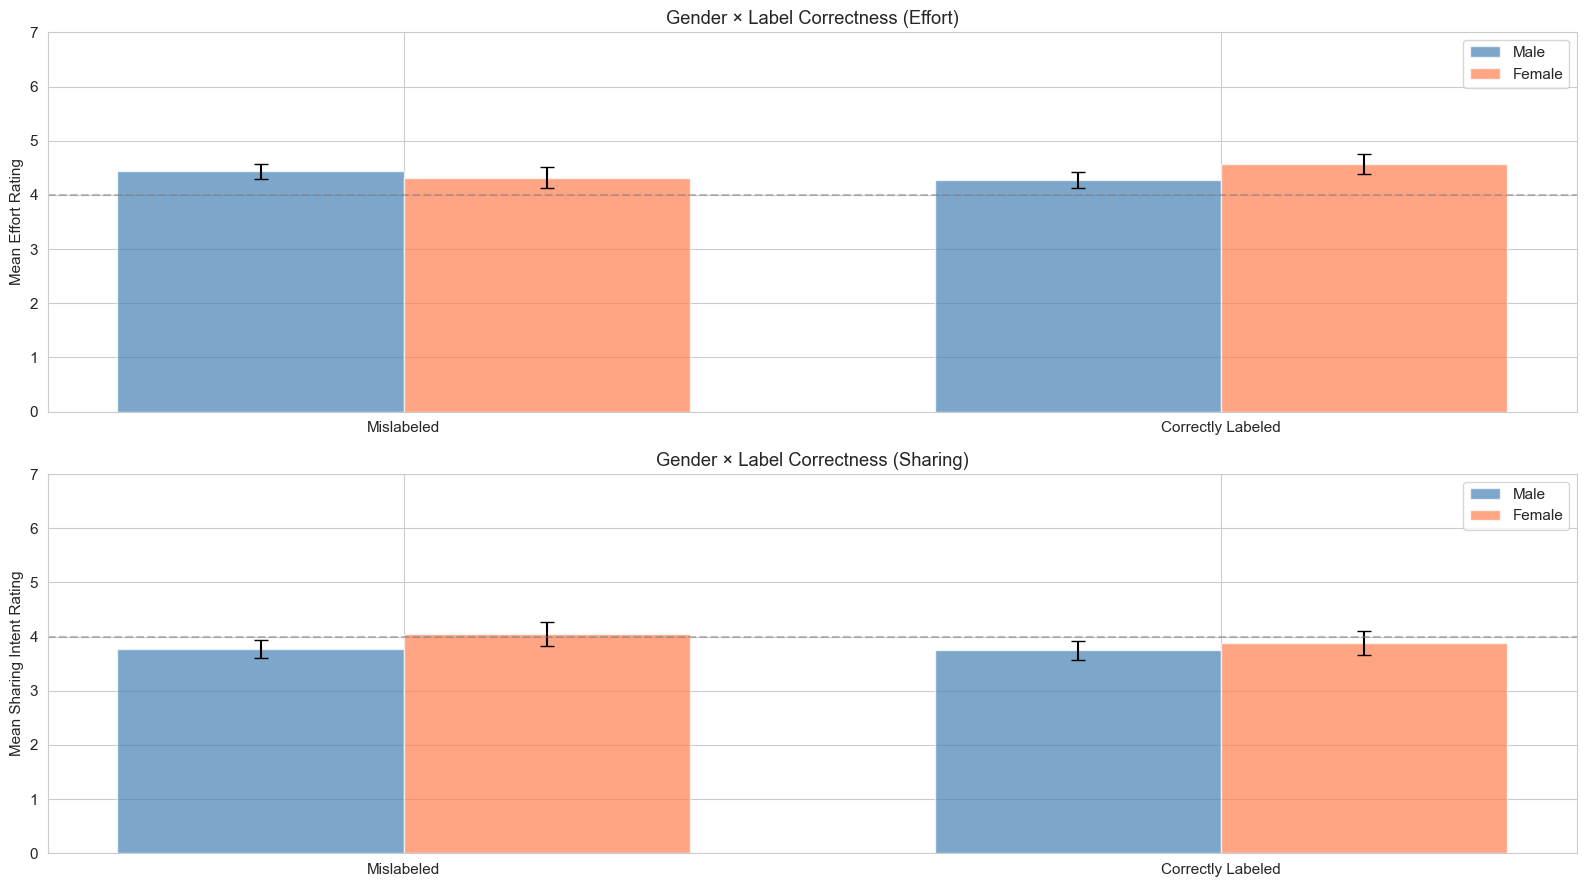

Saved: gender_moderation.png


In [31]:
# --- Visualization ---
fig, axes = plt.subplots(2, 1, figsize=(16, 9))

# Effort by gender and label correctness
gender_effort = gender_df.groupby(['gender', 'label_correct'])['effort_rating'].agg(['mean', 'sem']).reset_index()

x = np.arange(2)
width = 0.35

male_effort = gender_effort[gender_effort['gender'] == 'Male']
female_effort = gender_effort[gender_effort['gender'] == 'Female']

axes[0].bar(x - width/2, male_effort['mean'], width, yerr=male_effort['sem'],
            label='Male', capsize=5, color='steelblue', alpha=0.7)
axes[0].bar(x + width/2, female_effort['mean'], width, yerr=female_effort['sem'],
            label='Female', capsize=5, color='coral', alpha=0.7)

axes[0].set_ylabel('Mean Effort Rating')
axes[0].set_title('Gender × Label Correctness (Effort)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Mislabeled', 'Correctly Labeled'])
axes[0].legend()
axes[0].set_ylim(0, 7)
axes[0].axhline(y=4, color='gray', linestyle='--', alpha=0.5)

# Sharing by gender and label correctness
gender_sharing = gender_df.groupby(['gender', 'label_correct'])['sharing_rating'].agg(['mean', 'sem']).reset_index()

male_sharing = gender_sharing[gender_sharing['gender'] == 'Male']
female_sharing = gender_sharing[gender_sharing['gender'] == 'Female']

axes[1].bar(x - width/2, male_sharing['mean'], width, yerr=male_sharing['sem'],
            label='Male', capsize=5, color='steelblue', alpha=0.7)
axes[1].bar(x + width/2, female_sharing['mean'], width, yerr=female_sharing['sem'],
            label='Female', capsize=5, color='coral', alpha=0.7)

axes[1].set_ylabel('Mean Sharing Intent Rating')
axes[1].set_title('Gender × Label Correctness (Sharing)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['Mislabeled', 'Correctly Labeled'])
axes[1].legend()
axes[1].set_ylim(0, 7)
axes[1].axhline(y=4, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('figures/gender_moderation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: gender_moderation.png")

---
## 14. Individual Differences: AI Familiarity - weak

In [32]:
# Split by AI familiarity (median split)
median_familiarity = participant_df['ai_familiarity'].median()
print(f"\nMedian AI Familiarity: {median_familiarity}")

# Add familiarity group to merged data
familiarity_map = participant_df.set_index('email')['ai_familiarity'].to_dict()
merged_df['familiarity_group'] = (merged_df['ai_familiarity'] > median_familiarity).map(
    {True: 'High', False: 'Low'}
)

print(f"\nLow Familiarity: {(merged_df['familiarity_group'] == 'Low').sum() // 4} participants")
print(f"High Familiarity: {(merged_df['familiarity_group'] == 'High').sum() // 4} participants")

# Compare mislabel effects by familiarity group
print("\n--- LABEL CORRECTNESS EFFECT BY FAMILIARITY GROUP ---")

for group in ['Low', 'High']:
    group_data = merged_df[merged_df['familiarity_group'] == group]
    
    true_labels = group_data[group_data['label_correct'] == True]
    mislabels = group_data[group_data['label_correct'] == False]
    
    print(f"\n{group} Familiarity Group:")
    print(f"  Effort - True: {true_labels['effort_rating'].mean():.2f}, Mislabel: {mislabels['effort_rating'].mean():.2f}")
    print(f"  Sharing - True: {true_labels['sharing_rating'].mean():.2f}, Mislabel: {mislabels['sharing_rating'].mean():.2f}")
    
    # Calculate effect size for this group
    effort_diff = true_labels['effort_rating'].mean() - mislabels['effort_rating'].mean()
    sharing_diff = true_labels['sharing_rating'].mean() - mislabels['sharing_rating'].mean()
    
    print(f"  Effect (True - Mislabel): Effort = {effort_diff:.2f}, Sharing = {sharing_diff:.2f}")


Median AI Familiarity: 5.0

Low Familiarity: 77 participants
High Familiarity: 40 participants

--- LABEL CORRECTNESS EFFECT BY FAMILIARITY GROUP ---

Low Familiarity Group:
  Effort - True: 4.36, Mislabel: 4.31
  Sharing - True: 3.68, Mislabel: 3.73
  Effect (True - Mislabel): Effort = 0.05, Sharing = -0.05

High Familiarity Group:
  Effort - True: 4.41, Mislabel: 4.49
  Sharing - True: 4.01, Mislabel: 4.19
  Effect (True - Mislabel): Effort = -0.08, Sharing = -0.17


In [33]:
# Correlation analysis: Familiarity with label sensitivity
print("\n--- CORRELATION: FAMILIARITY & LABEL SENSITIVITY ---")

# Calculate per-participant difference scores (True Label - Mislabel)
participant_effects = merged_df.groupby(['email', 'label_correct']).agg({
    'effort_rating': 'mean',
    'sharing_rating': 'mean',
    'ai_familiarity': 'first'
}).reset_index()

# Pivot to get True vs False for difference calculation
effect_effort = participant_effects.pivot(index='email', columns='label_correct', 
                                          values='effort_rating').dropna()
effect_sharing = participant_effects.pivot(index='email', columns='label_correct',
                                           values='sharing_rating').dropna()

# Get familiarity for these participants
familiarity_values = participant_effects.groupby('email')['ai_familiarity'].first().loc[effect_effort.index]

# Calculate difference scores (positive = higher for true labels)
effort_sensitivity = effect_effort[True] - effect_effort[False]
sharing_sensitivity = effect_sharing[True] - effect_sharing[False]

# Correlations
corr_effort, p_effort = stats.pearsonr(familiarity_values, effort_sensitivity)
corr_sharing, p_sharing = stats.pearsonr(familiarity_values, sharing_sensitivity)

print(f"\nCorrelation (Familiarity × Effort Sensitivity):  r = {corr_effort:.3f}, p = {p_effort:.4f}")
print(f"Correlation (Familiarity × Sharing Sensitivity): r = {corr_sharing:.3f}, p = {p_sharing:.4f}")
print("\n(Positive sensitivity = larger difference favoring true labels)")


--- CORRELATION: FAMILIARITY & LABEL SENSITIVITY ---

Correlation (Familiarity × Effort Sensitivity):  r = -0.092, p = 0.3228
Correlation (Familiarity × Sharing Sensitivity): r = -0.056, p = 0.5466

(Positive sensitivity = larger difference favoring true labels)


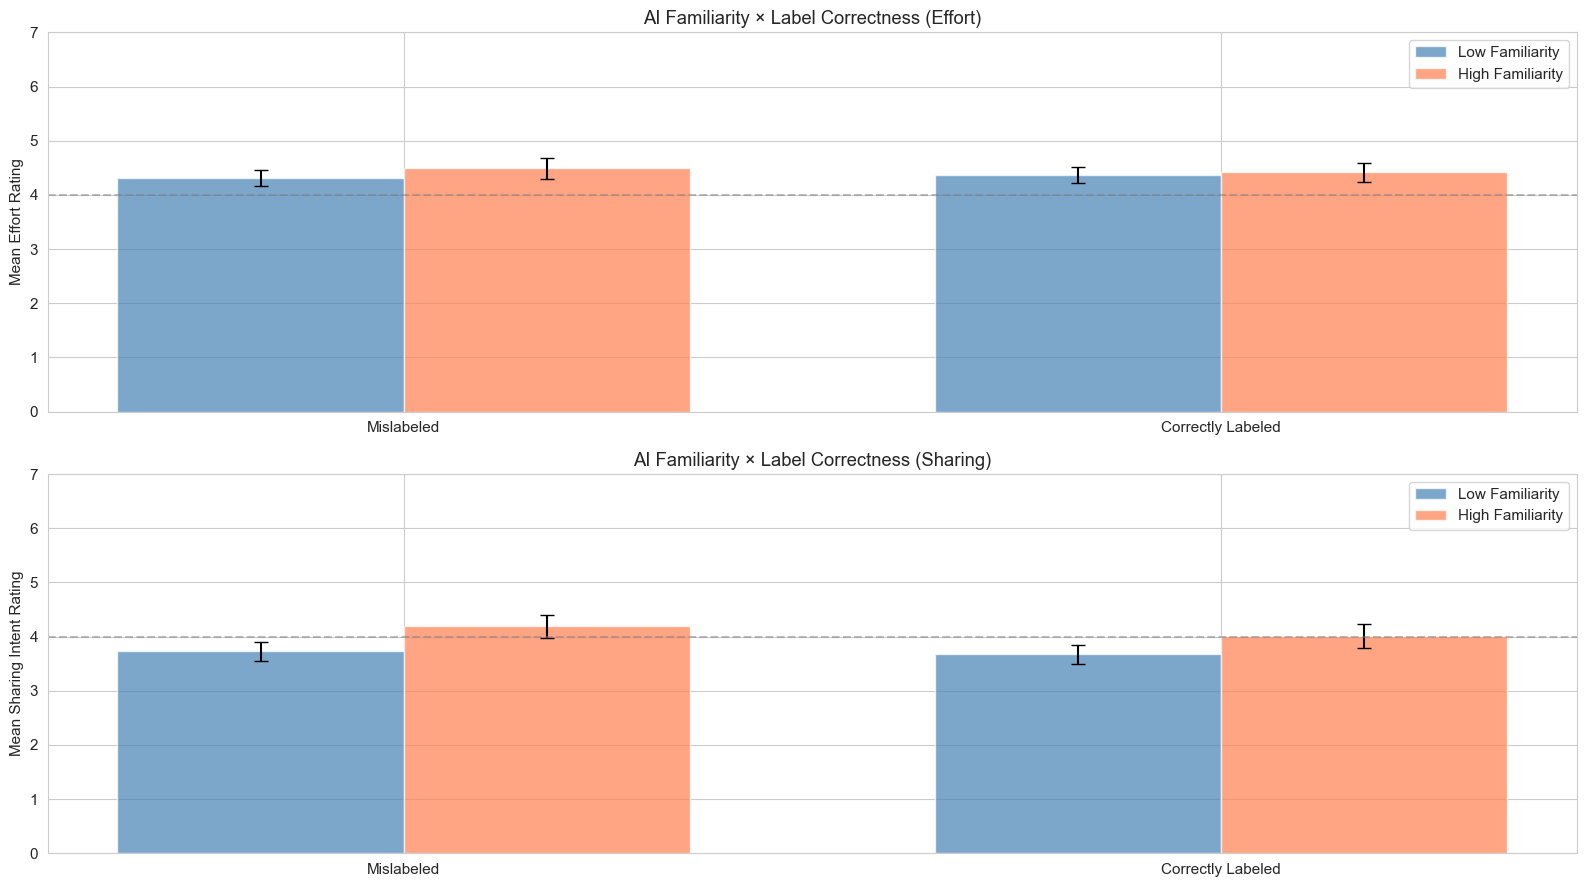

Saved: familiarity_moderation.png


In [34]:
# Visualization: Familiarity moderation
fig, axes = plt.subplots(2, 1, figsize=(16, 9))

# Effort by familiarity and label correctness
fam_data_effort = merged_df.groupby(['familiarity_group', 'label_correct'])['effort_rating'].agg(['mean', 'sem']).reset_index()

x = np.arange(2)
width = 0.35

low_effort = fam_data_effort[fam_data_effort['familiarity_group'] == 'Low']
high_effort = fam_data_effort[fam_data_effort['familiarity_group'] == 'High']

axes[0].bar(x - width/2, low_effort['mean'], width, yerr=low_effort['sem'],
            label='Low Familiarity', capsize=5, color='steelblue', alpha=0.7)
axes[0].bar(x + width/2, high_effort['mean'], width, yerr=high_effort['sem'],
            label='High Familiarity', capsize=5, color='coral', alpha=0.7)

axes[0].set_ylabel('Mean Effort Rating')
axes[0].set_title('AI Familiarity × Label Correctness (Effort)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(['Mislabeled', 'Correctly Labeled'])
axes[0].legend()
axes[0].set_ylim(0, 7)
axes[0].axhline(y=4, color='gray', linestyle='--', alpha=0.5)

# Sharing by familiarity and label correctness
fam_data_sharing = merged_df.groupby(['familiarity_group', 'label_correct'])['sharing_rating'].agg(['mean', 'sem']).reset_index()

low_sharing = fam_data_sharing[fam_data_sharing['familiarity_group'] == 'Low']
high_sharing = fam_data_sharing[fam_data_sharing['familiarity_group'] == 'High']

axes[1].bar(x - width/2, low_sharing['mean'], width, yerr=low_sharing['sem'],
            label='Low Familiarity', capsize=5, color='steelblue', alpha=0.7)
axes[1].bar(x + width/2, high_sharing['mean'], width, yerr=high_sharing['sem'],
            label='High Familiarity', capsize=5, color='coral', alpha=0.7)

axes[1].set_ylabel('Mean Sharing Intent Rating')
axes[1].set_title('AI Familiarity × Label Correctness (Sharing)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['Mislabeled', 'Correctly Labeled'])
axes[1].legend()
axes[1].set_ylim(0, 7)
axes[1].axhline(y=4, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig('figures/familiarity_moderation.png', dpi=300, bbox_inches='tight')
plt.show()

print("Saved: familiarity_moderation.png")

---
## 15. Summary Statistics Table

In [35]:
# Create comprehensive summary table
summary_table = merged_df.groupby('condition_code').agg({
    'effort_rating': ['mean', 'std', 'min', 'max'],
    'sharing_rating': ['mean', 'std', 'min', 'max'],
    'email': 'count'
}).round(2)

summary_table.columns = ['Effort_Mean', 'Effort_SD', 'Effort_Min', 'Effort_Max',
                         'Sharing_Mean', 'Sharing_SD', 'Sharing_Min', 'Sharing_Max', 'N']

print("=" * 80)
print("SUMMARY TABLE: ALL CONDITIONS")
print("=" * 80)
print(summary_table)

# Save to CSV
summary_table.to_csv('summary_statistics.csv')
print("\nSaved: summary_statistics.csv")

SUMMARY TABLE: ALL CONDITIONS
                Effort_Mean  Effort_SD  Effort_Min  Effort_Max  Sharing_Mean  \
condition_code                                                                 
FN                     4.80       1.59           1           7          4.17   
FP                     3.94       1.76           1           7          3.60   
TN                     4.91       1.69           1           7          4.21   
TP                     3.85       1.66           1           7          3.38   

                Sharing_SD  Sharing_Min  Sharing_Max    N  
condition_code                                             
FN                    1.91            1            7  117  
FP                    2.10            1            7  117  
TN                    2.04            1            7  117  
TP                    2.12            1            7  117  

Saved: summary_statistics.csv


---
## 16. Results Summary & Export

In [36]:
# Compile all key results into a report
results_summary = f"""
{'=' * 80}
IMAGE PERCEPTION STUDY - RESULTS SUMMARY
{'=' * 80}

SAMPLE:
- Total Participants: {len(participant_df)}
- Total Observations: {len(merged_df)} (4 per participant)
- Age Range: {participant_df['age'].value_counts().index.tolist()}
- Gender: {dict(participant_df['gender'].value_counts())}
- AI Familiarity: M = {participant_df['ai_familiarity'].mean():.2f}, SD = {participant_df['ai_familiarity'].std():.2f}

MAIN FINDINGS:

1. IMAGE ORIGIN EFFECT (Correctly Labeled Only):
   Effort Rating:
   - AI Images:   M = {ai_images['effort_rating'].mean():.2f}, SD = {ai_images['effort_rating'].std():.2f}
   - Real Images: M = {real_images['effort_rating'].mean():.2f}, SD = {real_images['effort_rating'].std():.2f}
   - t({len(effort_origin_pivot)-1}) = {effort_origin_t:.3f}, p = {effort_origin_p:.4f}, d_z = {effort_origin_d:.3f}
   
   Sharing Intent:
   - AI Images:   M = {ai_images['sharing_rating'].mean():.2f}, SD = {ai_images['sharing_rating'].std():.2f}
   - Real Images: M = {real_images['sharing_rating'].mean():.2f}, SD = {real_images['sharing_rating'].std():.2f}
   - t({len(sharing_origin_pivot)-1}) = {sharing_origin_t:.3f}, p = {sharing_origin_p:.4f}, d_z = {sharing_origin_d:.3f}

2. ORIGIN × LABEL INTERACTION:
   See ANOVA results and interaction plots for detailed analysis.
   - Effort: Significant crossover interaction (F = 27.23, p < 0.0001)
   - Sharing: Significant crossover interaction (F = 15.63, p = 0.0001)
   - LMM: Origin × Label β = 1.932 (effort), 1.402 (sharing), both p < 0.001

3. SPECIFIC CONDITIONS:
   FP (Real→AI): Effort = {fp_data['effort_rating'].mean():.2f}, Sharing = {fp_data['sharing_rating'].mean():.2f}
   FN (AI→Real): Effort = {fn_data['effort_rating'].mean():.2f}, Sharing = {fn_data['sharing_rating'].mean():.2f}
   TP (AI→AI):   Effort = {tp_data['effort_rating'].mean():.2f}, Sharing = {tp_data['sharing_rating'].mean():.2f}
   TN (Real→Real): Effort = {tn_data['effort_rating'].mean():.2f}, Sharing = {tn_data['sharing_rating'].mean():.2f}

4. HETEROGENEITY ANALYSES:
   Gender Moderation:
   - Effort 3-way interaction: p = {effort_3way_p:.4f}
   - Sharing 3-way interaction: p = {sharing_3way_p:.4f}
   - Conclusion: {'No significant gender moderation' if effort_3way_p > 0.05 and sharing_3way_p > 0.05 else 'Significant gender differences detected'}
   
   AI Familiarity Moderation:
   - Correlation with Effort Sensitivity:  r = {corr_effort:.3f}, p = {p_effort:.4f}
   - Correlation with Sharing Sensitivity: r = {corr_sharing:.3f}, p = {p_sharing:.4f}
   - Conclusion: No moderation effect (expertise doesn't protect against labels)

5. MODEL FIT:
   LMM Variance Explained (Marginal R²):
   - Effort: 8.3% (manipulation accounts for modest variance)
   - Sharing: 5.2% (low but expected for 7-point scales)

FILES GENERATED:
- merged_data.csv
- summary_statistics.csv
- dv_distributions.png
- effort_sharing_correlation.png
- image_origin_effect.png
- all_conditions_comparison.png
- interaction_plot.png
- image_level_effects.png
- gender_moderation.png
- familiarity_moderation.png

{'=' * 80}
"""

print(results_summary)

# Save results summary
with open('results_summary.txt', 'w', encoding='utf-8') as f:
    f.write(results_summary)

print("\nResults summary saved to: results_summary.txt")


IMAGE PERCEPTION STUDY - RESULTS SUMMARY

SAMPLE:
- Total Participants: 117
- Total Observations: 468 (4 per participant)
- Age Range: ['21 - 23', '18 - 20', '24 - 26', '27 or above']
- Gender: {'Male': np.int64(68), 'Female': np.int64(48), 'Other': np.int64(1)}
- AI Familiarity: M = 4.34, SD = 1.96

MAIN FINDINGS:

1. IMAGE ORIGIN EFFECT (Correctly Labeled Only):
   Effort Rating:
   - AI Images:   M = 3.85, SD = 1.66
   - Real Images: M = 4.91, SD = 1.69
   - t(116) = -5.262, p = 0.0000, d_z = -0.486

   Sharing Intent:
   - AI Images:   M = 3.38, SD = 2.12
   - Real Images: M = 4.21, SD = 2.04
   - t(116) = -3.681, p = 0.0004, d_z = -0.340

2. ORIGIN × LABEL INTERACTION:
   See ANOVA results and interaction plots for detailed analysis.
   - Effort: Significant crossover interaction (F = 27.23, p < 0.0001)
   - Sharing: Significant crossover interaction (F = 15.63, p = 0.0001)
   - LMM: Origin × Label β = 1.932 (effort), 1.402 (sharing), both p < 0.001

3. SPECIFIC CONDITIONS:
   FP